In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

C:\Users\mrmak\AppData\Local\Temp\ipykernel_16716\4192095167.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 0. Описание задачи

 Определение диапозона цен машин при известных параметрах: бренда, модели, года выпуска, цвета и т.д.

# 1. Загрузка и чтение данных 

In [2]:
url = "https://raw.githubusercontent.com/mTochilashvili/MachineLearning/main/BD/USA_cars_datasets.csv"
data_raw = pd.read_csv(url)
data = pd.read_csv(url)
data_raw.shape

(2499, 13)

Таблица содержит данные о 2499 брендах машин с описанием 13 параметров

In [3]:
data_raw.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


Выведем все признаки из датасета

In [4]:
data_raw.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

Удалим ненужные признаки

In [5]:
data_raw.drop(['Unnamed: 0', 'vin', 'lot', 'condition'], axis=1, inplace = True)

Признаки:
    
    1. Price - цена машин
    2. Brand - бренд машины 
    3. Model - модель 
    4. Year - год выпуска
    5. title_status - показывает статус машины (clean vehicle - нет случаев с авариями, salvage insurance - страхование от аварийного восстановления)
    6. mileage - пробег
    7. color - цвет машины 
    8. vin - это идентификационной номер автомобиля или другого транспортного средства, состоит из 17 символов
    9. lot - это идентификационный номер, присвоенный определенному количеству или партии материала от одного производителя. 
    Для автомобилей номер партии объединяется с серийным номером для формирования идентификационного номера транспортного средства.
    10. state - штат 
    11. country - страна
    12. condition - статус 


Так как мы хотим определить цену, посмотрим на значения в этом столбце.

In [6]:
data_raw['price']

0        6300
1        2899
2        5350
3       25000
4       27700
        ...  
2494     7800
2495     9200
2496     9200
2497     9200
2498     9200
Name: price, Length: 2499, dtype: int64

Создадим бинарный признак `'binary_price'`, чтобы разделить цену по диапозонам выше или ниже 42450.

In [7]:
data_raw['binary_price'] = np.where(data_raw['price'] >= 42450, 1, 0)
data_raw[['price', 'binary_price']]

,price,binary_price
0,6300,0
1,2899,0
2,5350,0
3,25000,0
4,27700,0
...,...,...
2494,7800,0
2495,9200,0
2496,9200,0
2497,9200,0


Столбцы `'brand'`, `'country'` и `'title_status'` содержат категориальные значения. Пока они имеют тип `'Object`'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [8]:
data_raw['brand'] = data_raw['brand'].astype('category')
data_raw['brand'].dtype

CategoricalDtype(categories=['acura', 'audi', 'bmw', 'buick', 'cadillac', 'chevrolet',
                  'chrysler', 'dodge', 'ford', 'gmc', 'harley-davidson',
                  'heartland', 'honda', 'hyundai', 'infiniti', 'jaguar',
                  'jeep', 'kia', 'land', 'lexus', 'lincoln', 'maserati',
                  'mazda', 'mercedes-benz', 'nissan', 'peterbilt', 'ram',
                  'toyota'],
, ordered=False, categories_dtype=object)

In [9]:
data_raw['title_status'] = data_raw['title_status'].astype('category')
data_raw['title_status'].dtype

CategoricalDtype(categories=['clean vehicle', 'salvage insurance'], ordered=False, categories_dtype=object)

In [10]:
data_raw['country'] = data_raw['country'].astype('category')
data_raw['country'].dtype

CategoricalDtype(categories=[' canada', ' usa'], ordered=False, categories_dtype=object)

## 2. Визуализация и описательная статистика

Получим информацию о признаках.

In [11]:
data_raw.describe()

,price,year,mileage,binary_price
count,2499.000000,2499.000000,2.499000e+03,2499.000000
mean,18767.671469,2016.714286,5.229869e+04,0.049620
std,12116.094936,3.442656,5.970552e+04,0.217202
min,0.000000,1973.000000,0.000000e+00,0.000000
25%,10200.000000,2016.000000,2.146650e+04,0.000000
50%,16900.000000,2018.000000,3.536500e+04,0.000000
75%,25555.500000,2019.000000,6.347250e+04,0.000000
max,84900.000000,2020.000000,1.017936e+06,1.000000


По умолчанию метод выше дает информацию только о количественных признаках.
Получим информацию о категориальных:

In [12]:
data_raw.describe(include=['category'])

,brand,title_status,country
count,2499,2499,2499
unique,28,2,2
top,ford,clean vehicle,usa
freq,1235,2336,2492


Вычислим матрицу корреляции для количественных признаков и визуализируем её образ.

In [13]:
corr_mat = data_raw.corr()
corr_mat

ValueError: could not convert string to float: 'cruiser'

In [26]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

NameError: name 'corr_mat' is not defined

Построим всевозможные диаграммы рассеивания для каждой пары переменных:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


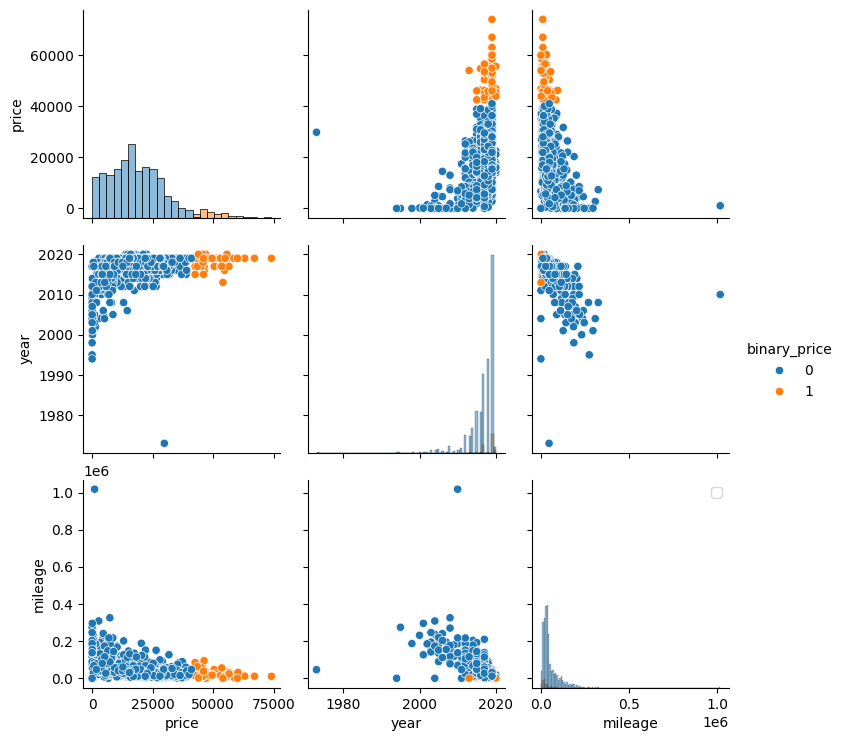

In [25]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)
sns.pairplot(data_raw.iloc[random_subset], hue='binary_price', diag_kind='hist')
plt.legend()
pass

##  3. Заполнение пропущенных значений 

Проверим, сколько пропущенных значений в каждом столбце матрицы:

In [22]:
data_raw.isna().sum()  

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
country         0
binary_price    0
dtype: int64

## 4. Бинаризация номинальных признаков

Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых принаков. Скопируем нужные признаки в новую таблицу.

In [20]:
data_new = data_raw.loc[:, ['price', 'brand', 'model', 'year', 'title_status', 
                        'mileage', 'color', 'country', 
                        'binary_price']].copy()

Бинарные признаки `'color'` и `'country'` заменим на числовые.

In [21]:
data_new['color'] = pd.factorize(data_new['color'])[0]
data_new['country'] = pd.factorize(data_new['country'])[0]

К небинарномым признакам `'title_status'`, `'model'` и `'brand'` применим метод бинаризации с помощью функции `get_dummies`:

In [24]:
Title_Status_dummies = pd.get_dummies(data['title_status'])
Title_Status_dummies.head(7)

,clean vehicle,salvage insurance
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
5,True,False
6,True,False


In [23]:
Model_dummies = pd.get_dummies(data['model'])
Model_dummies.head(7)

,1500,2500,2500hd,300,3500,5,acadia,altima,armada,bus,...,van,vans,vehicl,versa,volt,wagon,x3,xd,xt5,xterra
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
Brand_dummies = pd.get_dummies(data['brand'])
Brand_dummies.head(7)

,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,gmc,...,land,lexus,lincoln,maserati,mazda,mercedes-benz,nissan,peterbilt,ram,toyota
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Добавим эти dummy-столбцы к таблице и удалим соответствующие столбецы:

In [17]:
data_new = pd.concat((data_new, Title_Status_dummies), axis=1)
data_new = data_new.drop(['title_status'], axis=1)
data_new = pd.concat((data_new, Model_dummies), axis=1)
data_new = data_new.drop(['model'], axis=1)
data_new = pd.concat((data_new, Brand_dummies), axis=1)
data_new = data_new.drop(['brand'], axis=1)

NameError: name 'data_new' is not defined

In [ ]:
data_new.head()

## 5. Нормализация количественных признаков

Перед применением алгоритмов машинного обучения количественные признаки нужно нормализовать. Выполним приведение всех признаков к отрезку $[0,1]$.

In [ ]:
data_new.columns

In [ ]:
data_norm = (data_new - data_new.min(axis=0)) / (data_new.max(axis=0) - data_new.min(axis=0))
data_norm.describe()

## 6. Отбор признаков
Для предсказания стоимости автомобиля `'binary_price'` будем использовать все входные признаки кроме `'price'` и `'binary_price'`.

In [ ]:
data_norm.columns

In [ ]:
X = data_norm.drop(['price', 'binary_price'], axis=1)
y = data_norm['binary_price']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import train_test_split

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state = 42)
model = neighbors.KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

N_train, _ = X_train.shape
N_test, _ = X_test.shape
N_train, N_test

## 7. Классификатор ближайших соседей kNN

In [ ]:
from sklearn import metrics

In [ ]:
print(1 - metrics.accuracy_score(y_test, y_test_pred))
print(np.mean(y_test != y_test_pred))

In [ ]:
print(1 - metrics.accuracy_score(y_test, y_test_pred))
print(np.mean(y_test != y_test_pred))

In [ ]:
k_range = range(1, 30)
err_train = []
err_test = []
for k in k_range:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

In [ ]:
plt.plot(k_range, err_train, '.-r', label = 'Train error')
plt.plot(k_range, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)
plt.xlim([30, 0])
pass

In [ ]:
print(min(err_test))
print(err_train[k_range[err_test.index(min(err_test))]])
print(k_range[err_test.index(min(err_test))])


Получено оптимально число ближайших соседей - 17 c минимальным значением ошибки на тестовой выборке и соответствующем значением ошибки на обучающей выборке. Ввиду ненатренерованности модели ошибка на обучающей выборке ниже, чем на тестовой. При увеличении количества соседей ошибка на обучающей выборке ухудшается, но незначительно улучшается ошибка на тестовой до определенного числа соседей.

## 8. Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("error_train : {:.16f}, error_test: {:.16f} ".format(err_train, err_test))

Алгоритм случайного леса оказался близок по точности с алгоритмом k-ближайших соседей при оптимальных параметрах каждого из методов на тестовой выборке, на обучающей значительно точнее. У тренировочной выборки ошибка мала и близка к нулю.

# 9 Выводы
В работе производился анализ данных о стоимости автомобилей и решение задачи классификации с помощью моделей, которые были натренированы методами k-ближайших соседей и случайного леса. В ходе работы проведены:
1. Вычисление основных статистических характеристик и их анализ
2. Нормализация количественных признаков (с помощью линейного преобразования к отрезку [0, 1])
3. Разбиение данных на обучающую и тестовую выборки
4. Выбор алгоритма классификации и проверка качества модели
5. Сравнение 2 моделей, алгоритм случайного леса оказался лучше метода к-ближайших соседей